In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip install transformers==3.2.0

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 35.0 MB/s 
     |████████████████████████████████| 3.0 MB 44.0 MB/s 
     |████████████████████████████████| 895 kB 36.9 MB/s 


In [ ]:
import pandas as pd
final_data = pd.read_csv("/content/train_qdiff_data_2_soft_labeled.csv")
final_data

,Question,Answer,DifficultyFromAnswerer,question_answer,difficulty_label,skill_label
0,Is the dialect spoken in Jeju located in fact ...,The dialect spoken in Jeju is in fact classifi...,hard,Is the dialect spoken in Jeju located in fact ...,1,3
1,What cello manufacturer should I buy from if I...,Luis & Clark,hard,What cello manufacturer should I buy from if I...,1,3
2,Does it have a border with Norway?,yes,medium,Does it have a border with Norway? yes,2,2
3,How many people use the bus network daily?,More than 2.78 million people.,easy,How many people use the bus network daily? Mor...,0,2
4,Who founded Montevideo?,The Spanish.,medium,Who founded Montevideo? The Spanish.,2,2
...,...,...,...,...,...,...
2763,Did he become a professor before the revolutio...,yes,hard,Did he become a professor before the revolutio...,1,3
2764,Does Vietnamese borrow from Latin and Greek?,"No, Vietnamese does not borrow from Latin and ...",medium,Does Vietnamese borrow from Latin and Greek? N...,2,3
2765,Where is San Francisco?,San Francisco is in California.,medium,Where is San Francisco? San Francisco is in Ca...,2,3
2766,What is the primary item in an otter's diet?,fish,medium,What is the primary item in an otter's diet? fish,2,2


In [ ]:
final_data["question_answer"].values

array(['Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.',
       'What cello manufacturer should I buy from if I want to play outside? Luis & Clark',
       'Does it have a border with Norway? yes', ...,
       'Where is San Francisco? San Francisco is in California.',
       "What is the primary item in an otter's diet? fish",
       'Where are turtle eggs layed? Turtles lay eggs on land.'],
      dtype=object)

In [ ]:
final_data['difficulty_label'].value_counts()

0    1099
2    1001
1     668
Name: difficulty_label, dtype: int64

In [ ]:
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/research_skill_name_prediction/label_encoder_difficulty_Lstm"  /content

In [ ]:
!cp "/content/drive/MyDrive/research_skill_name_prediction/label_encoder_skill_lstm" /content

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_pre_trained_skill_bert_data_2" /content

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_prediction_data_2" /content

In [ ]:
import joblib
LE_skill = joblib.load('label_encoder_skill_lstm')
LE_skill.classes_

array(['Analysing', 'Applying', 'Knowledge & understanding',
       'Remembering', 'Understanding'], dtype=object)

In [ ]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

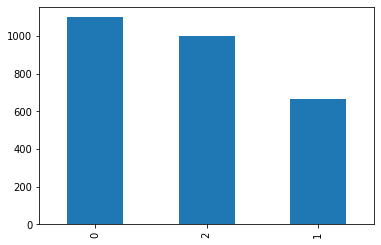

In [ ]:
final_data['difficulty_label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
val = pd.read_csv("/content/val_qdiff_data_2_soft_labeled.csv")

In [ ]:
val

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
0,What are turtle eggs covered in when they incu...,mud or sand,hard,1,What are turtle eggs covered in when they incu...,2
1,What is given for the number of native speakers?,No figure is given for the number of native sp...,hard,1,What is given for the number of native speaker...,3
2,How many long was Lincoln's formal education?,18 months,easy,0,How many long was Lincoln's formal education? ...,3
3,who was his mentor?,John 'Mad Jack' Fuller,medium,2,who was his mentor? John 'Mad Jack' Fuller,3
4,Can black swans swim with only one leg?,yes,easy,0,Can black swans swim with only one leg? yes,3
...,...,...,...,...,...,...
303,Is Berlin the capital city of Germany?,Berlin is the capital city of Germany.,easy,0,Is Berlin the capital city of Germany? Berlin ...,3
304,Who did James Monroe live with in New York City?,His daughter Maria Hester Monroe Gouverneur,medium,2,Who did James Monroe live with in New York Cit...,3
305,What is one of the challenges of re-establishi...,roadkill deaths,hard,1,What is one of the challenges of re-establishi...,2
306,Is Santiago the national capital of a country?,Yes,easy,0,Is Santiago the national capital of a country?...,3


In [ ]:
test = pd.read_csv("/content/test_qdiff_data_2_soft_labeled.csv")
test

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
0,How are western-style xylophones characterised?,"by a bright, sharp tone and high register",medium,2,How are western-style xylophones characterised...,2
1,Is Nairobi the capital of Kenya?,Yes,easy,0,Is Nairobi the capital of Kenya? Yes,3
2,How many sister cities does the City of Melbou...,six,medium,2,How many sister cities does the City of Melbou...,3
3,Is the electric eel a true eel?,No,easy,0,Is the electric eel a true eel? No,3
4,Does Swedish use the perfect participle to for...,No.,easy,0,Does Swedish use the perfect participle to for...,3
...,...,...,...,...,...,...
337,Where was there a vast swarm of butterflies?,In Kyoto there was a vast swarm of butterflies.,medium,2,Where was there a vast swarm of butterflies? I...,3
338,What is the most common romanization standard ...,Hanyu Pinyin,medium,2,What is the most common romanization standard ...,3
339,Is Jakarta the 12th largest city in the world?,yes,medium,2,Is Jakarta the 12th largest city in the world?...,2
340,What sort of turtles are ectothermic?,all of them,medium,2,What sort of turtles are ectothermic? all of them,2


In [ ]:
test["question_answer"].values

array(['How are western-style xylophones characterised? by a bright, sharp tone and high register',
       'Is Nairobi the capital of Kenya? Yes',
       'How many sister cities does the City of Melbourne have? six',
       'Is the electric eel a true eel? No',
       'Does Swedish use the perfect participle to form the present perfect tense? No.',
       'Do the different species of zebras interbreed? no',
       'What are the reasons for hunting wild ducks? Meat, eggs, and feathers',
       'Does Romania share the same language with Moldova? Practically',
       'Which guitars use three single-coil pickups? Fender Stratocaster type guitars.',
       'How long does it take for the panda cubs skin to turn gray? One to two weeks',
       'Which temperature scale did Celsius propose? Celcius',
       'Where is Finland located? Northern Europe',
       'Is the capital city Oslo? No',
       'How many species of otter are there? 13',
       "What's the timber of ancient cimbals like? disfl

In [ ]:

import re

test["question_answer"] = test["question_answer"].apply(lambda x : clean_sentence(x))
test

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
0,How are western-style xylophones characterised?,"by a bright, sharp tone and high register",medium,2,How are western-style xylophones characterised...,2
1,Is Nairobi the capital of Kenya?,Yes,easy,0,Is Nairobi the capital of Kenya? Yes,3
2,How many sister cities does the City of Melbou...,six,medium,2,How many sister cities does the City of Melbou...,3
3,Is the electric eel a true eel?,No,easy,0,Is the electric eel a true eel? No,3
4,Does Swedish use the perfect participle to for...,No.,easy,0,Does Swedish use the perfect participle to for...,3
...,...,...,...,...,...,...
337,Where was there a vast swarm of butterflies?,In Kyoto there was a vast swarm of butterflies.,medium,2,Where was there a vast swarm of butterflies? I...,3
338,What is the most common romanization standard ...,Hanyu Pinyin,medium,2,What is the most common romanization standard ...,3
339,Is Jakarta the 12th largest city in the world?,yes,medium,2,Is Jakarta the 12th largest city in the world?...,2
340,What sort of turtles are ectothermic?,all of them,medium,2,What sort of turtles are ectothermic? all of them,2


In [ ]:
val = val.dropna(subset=["question_answer"])

In [ ]:
test["question_answer"].values

array(['How are western-style xylophones characterised? by a bright, sharp tone and high register',
       'Is Nairobi the capital of Kenya? Yes',
       'How many sister cities does the City of Melbourne have? six',
       'Is the electric eel a true eel? No',
       'Does Swedish use the perfect participle to form the present perfect tense? No.',
       'Do the different species of zebras interbreed? no',
       'What are the reasons for hunting wild ducks? Meat, eggs, and feathers',
       'Does Romania share the same language with Moldova? Practically',
       'Which guitars use three single-coil pickups? Fender Stratocaster type guitars.',
       'How long does it take for the panda cubs skin to turn gray? One to two weeks',
       'Which temperature scale did Celsius propose? Celcius',
       'Where is Finland located? Northern Europe',
       'Is the capital city Oslo? No',
       'How many species of otter are there? 13',
       "What's the timber of ancient cimbals like? disfl

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE = joblib.load('label_encoder_difficulty_Lstm')

get_labels(0)

'Difficult'

In [ ]:
final_data

,Question,Answer,DifficultyFromAnswerer,question_answer,difficulty_label,skill_label
0,Is the dialect spoken in Jeju located in fact ...,The dialect spoken in Jeju is in fact classifi...,hard,Is the dialect spoken in Jeju located in fact ...,1,3
1,What cello manufacturer should I buy from if I...,Luis & Clark,hard,What cello manufacturer should I buy from if I...,1,3
2,Does it have a border with Norway?,yes,medium,Does it have a border with Norway? yes,2,2
3,How many people use the bus network daily?,More than 2.78 million people.,easy,How many people use the bus network daily? Mor...,0,2
4,Who founded Montevideo?,The Spanish.,medium,Who founded Montevideo? The Spanish.,2,2
...,...,...,...,...,...,...
2763,Did he become a professor before the revolutio...,yes,hard,Did he become a professor before the revolutio...,1,3
2764,Does Vietnamese borrow from Latin and Greek?,"No, Vietnamese does not borrow from Latin and ...",medium,Does Vietnamese borrow from Latin and Greek? N...,2,3
2765,Where is San Francisco?,San Francisco is in California.,medium,Where is San Francisco? San Francisco is in Ca...,2,3
2766,What is the primary item in an otter's diet?,fish,medium,What is the primary item in an otter's diet? fish,2,2


In [ ]:
new_data = final_data

In [ ]:
question_answer = new_data["question_answer"].values
categories = new_data["difficulty_label"].values
skill_category = new_data["skill_label"].values

In [ ]:
question_answer

array(['Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.',
       'What cello manufacturer should I buy from if I want to play outside? Luis & Clark',
       'Does it have a border with Norway? yes', ...,
       'Where is San Francisco? San Francisco is in California.',
       "What is the primary item in an otter's diet? fish",
       'Where are turtle eggs layed? Turtles lay eggs on land.'],
      dtype=object)

In [ ]:
question_answer[0]

'Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.'

In [ ]:
len(categories)

2768

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.
Token IDs: tensor([  101,  2003,  1996,  9329,  5287,  1999, 15333,  9103,  2284,  1999,
         2755,  6219,  2004,  1037,  2367,  2653,  2011,  2035,  4759, 22978,
         2015,  1029,  1996,  9329,  5287,  1999, 15333,  9103,  2003,  1999,
         2755,  6219,  2004,  1037,  2367,  2653,  2011,  2070,  4759, 22978,
         2015,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
print('Original: ', len(question_answer[1]))
print('Token IDs:', len(input_ids[1]))

Original:  81
Token IDs: 128


In [ ]:
val_text = val["question_answer"].values
val_labels = val["difficulty_label"].values
val_skill_labels = val["skill_label"].values
test_text = test["question_answer"].values
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:
test_labels

array([2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,

In [ ]:
val_labels

array([1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0,
       1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0,
       1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1,
       0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,

In [ ]:
val_input_ids = []
val_attention_masks = []

for sent in val_text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    val_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', val_text[0])
print('Token IDs:', val_attention_masks[0])

Original:  What are turtle eggs covered in when they incubate? mud or sand
Token IDs: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print('Original: ', val_text[1])
print('Token IDs:', val_input_ids[1])

Original:  What is given for the number of native speakers? No figure is given for the number of native speakers.
Token IDs: tensor([ 101, 2054, 2003, 2445, 2005, 1996, 2193, 1997, 3128, 7492, 1029, 2053,
        3275, 2003, 2445, 2005, 1996, 2193, 1997, 3128, 7492, 1012,  102,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])


In [ ]:
labels = torch.tensor(categories)
skill_category = torch.tensor(skill_category)
val_labels = torch.tensor(val_labels)
val_skill_labels = torch.tensor(val_skill_labels)

In [ ]:
val_labels

tensor([1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1,
        1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
        2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2,
        1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
        0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2,
        2, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0,
        2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2,
        1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0,
        0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2,
        1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
        2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1,

In [ ]:
get_labels(1)

'Easy'

In [ ]:
len(set(final_data["question_answer"].values).intersection(val["question_answer"].values))

46

In [ ]:
num_classes = len(list(set(categories)))
list(set(categories))

[0, 1, 2]

In [ ]:
skill_label_count = len(list(set(new_data["skill_label"].values)))
skill_label_count

5

In [ ]:
list(set(new_data["skill_label"].values))

[0, 1, 2, 3, 4]

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels,skill_category)
val_dataset = TensorDataset(val_input_ids, val_attention_masks,val_labels,val_skill_labels) 
# Create a 90-10train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.90 * len(dataset))
# val_size = len(dataset) - train_size

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# # print('{:>5,} validation samples'.format(val_size))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            dataset,  # The training samples.
            sampler = RandomSampler(dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertModel, AdamW, BertConfig

# # Loads BertForSequenceClassification, the pretrained BERT model with a single 
# model = BertModel.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
# )

# # Tell pytorch to run this model on the GPU.
# model.cuda()

In [ ]:
set(test["question_answer"].values).intersection(set(final_data["question_answer"].values))

{'Approximately how many species of Testudines are alive today? 300',
 'Are all dialects of Korean similar to each other? Yes',
 'Are pocket trumpets compact B trumpets? yes',
 'Are wolves built for stamina? Yes',
 'Around how many recognized octopus species are there? There are around 300 recognized octopus species.',
 'Copenhagen is the capital of what country? Denmark',
 'Did Lincoln ever represent Alton & Sangamon Railroad? Yes',
 "Did Monroe' wedding happen at the Trinity Church in New York? Yes",
 'Do linguists often view Chinese as a language family? Yes, linguists often view Chinese as a language family.',
 'Does Modern Standard Arabic continue to evolve like other languages? yes',
 'Does Theodore Roosevelt have a brother? Yes',
 'Does every drumhead make the same sound? no',
 'Does the octopus have a hard beak? Yes, the octopus has a hard beak.',
 'Have cymbals been used historically to suggest bacchanal? Yes',
 'How many children did Avogadro have? six',
 'How many species of

In [ ]:
num_classes

3

In [ ]:
from torch import nn
# for plottign attentions
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output
        mlp_output = self.mlp(concat_output)
        skill_output = self.mlp2(concat_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output,attentions

In [ ]:
from torch import nn
class SkillClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, 5)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,_,_ = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output
        mlp_output = self.mlp(concat_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output

In [ ]:
skill_model = SkillClassifier('bert-base-uncased',num_classes, 768,500,140,dropout=0.1,freeze_bert=False)
skill_model.load_state_dict(torch.load("/content/model_bert_skill_prediction_data_2/model_weights"))
skill_model.cuda()

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

SkillClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [ ]:
from torch import nn


class Attention(nn.Module):
  def __init__(self,vector_1_dim,vector_2_dim):
    super(Attention, self).__init__()
    self.Weights = nn.Parameter(torch.rand(vector_2_dim,vector_1_dim))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self,vector_1,vector_2):
    #(batch_size,vector_2_dim,vector_1_dim)
    weights = self.Weights.repeat(vector_2.size(0),1,1)
    vector_1 = vector_1.unsqueeze(-1)  # (batch_size,vector_2_dim,vector_1_dim)
    weights = weights.matmul(vector_1) # results in (batch_size,vector_2_dim,1)
    weights = weights.repeat(vector_2.size(1),1,1,1).transpose(0,1)
    vector_2 = vector_2.unsqueeze(-2)
    attention_weights = torch.tanh(vector_2.matmul(weights).squeeze() + self.bias) # batch_size, vector_2_dim.size(0)
    if len(attention_weights.shape) ==1:
      attention_weights = attention_weights.squeeze()
      attention_weights = attention_weights.reshape(1,-1)
    attention_weights = attention_weights.squeeze()
    # print("torch.exp(attention_weights)",torch.exp(attention_weights).shape,attention_weights.shape,torch.exp(attention_weights).sum(dim=1).shape)
    attention_weights = torch.exp(attention_weights)/ torch.exp(attention_weights).sum(dim=1,keepdim=True)

    return attention_weights

# bloom interactive attention
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)

        self.skill_bert = skill_model
        self.dropout = nn.Dropout(dropout)
        self.bloom_attention = Attention(768, 768)

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(  
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output

        # mlp_output = self.mlp(concat_output)
        skill_output_probas = self.skill_bert(tokens,masks)
        skill_output = torch.argmax(skill_output_probas,axis=1).cpu().numpy()
        skill_output = LE_skill.inverse_transform(skill_output)
        skill_input_ids = []
        skill_attention_masks = []
        for skill_text in skill_output:
          encoded_skill_output = tokenizer.encode_plus(
                          skill_text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 128,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          truncation=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
          skill_input_ids.append(encoded_skill_output['input_ids'])
          skill_attention_masks.append(encoded_skill_output['attention_mask'])
        skill_input_ids = torch.cat(skill_input_ids,dim=0).cuda()
        skill_attention_masks = torch.cat(skill_attention_masks,dim=0).cuda()
        _,_,hidden_states_skill,_ = self.skill_bert.bert(skill_input_ids,skill_attention_masks)

        skill_hidden_averaged =  torch.sum(hidden_states_skill[12],dim=1)/hidden_states_skill[12].shape[1]

        bloom_attention_weights = self.bloom_attention(skill_hidden_averaged, hidden_states[12])

        bloom_attention_weights = bloom_attention_weights.unsqueeze(-2)
        # print("context_attention_weights",context_attention_weights.shape,context_out.shape)
        input_attended_vector = bloom_attention_weights.matmul(hidden_states[12]).squeeze()

        mlp_output = self.mlp(input_attended_vector)

        # print("bloom attention weights", bloom_attention_weights.shape)
        # print("_hidden_states",hidden_states_skill[12].shape, hidden_states[12].shape,skill_hidden_averaged.shape)

        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output_probas

In [ ]:
model = MultiClassClassifier('bert-base-uncased',num_classes, skill_label_count,768,500,140,dropout=0.1,freeze_bert=False)
# model.load_state_dict(torch.load("model_bert_multi_task_interactive_pre_trained_skill_bert/model_weights"))
model.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 20

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

87

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
# model.to(device)
model

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
for param in model.bert.encoder.layer[0:5].parameters():
    param.requires_grad=False
for param in model.bert.embeddings.parameters():
    param.requires_grad=False


In [ ]:
for param in model.skill_bert.bert.encoder.layer.parameters():
    param.requires_grad=False
for param in model.skill_bert.bert.embeddings.parameters():
    param.requires_grad=False

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
loss_func = nn.CrossEntropyLoss()


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=2, verbose=True)
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_accuracy = 0
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questimport gensim.downloader as api
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels
         
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        # b_poincare = batch[2].to(device)
        # b_difficulty = batch[3].to(device)
        b_labels = batch[2].to(device)
        skill_labels = batch[3].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        probas, skill_probs = model(b_input_ids,b_input_mask)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        loss_1 = loss_func(probas, b_labels)
        skill_loss = loss_func(skill_probs,skill_labels)
        loss = loss_1 + skill_loss
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        # scheduler.step()
        logits = probas.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_train_accuracy += flat_accuracy(logits, label_ids)
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    print(" Train Accuracy: {0:.2f}".format(avg_train_accuracy))

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader) 

            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        # b_poincare = batch[2].to(device)
        # b_difficulty = batch[3].to(device)
        b_labels = batch[2].to(device)
        skill_labels = batch[3].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.

          logits, skill_logits = model(b_input_ids,b_input_mask)
            
        # Accumulate the validation loss.
        loss_1 = loss_func(logits, b_labels)
        skill_loss = loss_func(skill_logits,skill_labels)
        loss = loss_1 + skill_loss
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_bert_multi_task_interactive_pre_trained_skill_bert_data_2/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

    !rm -rf "/content/drive/My Drive/research_skill_name_prediction/model_bert_multi_task_interactive_pre_trained_skill_bert_data_2"
    !mv model_bert_multi_task_interactive_pre_trained_skill_bert_data_2 "/content/drive/My Drive/research_skill_name_prediction/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 20 ========
Training...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


  Batch    40  of     87.    Elapsed: 0:01:14.
  Batch    80  of     87.    Elapsed: 0:02:30.
 Train Accuracy: 0.64

  Average training loss: 1.01
  Training epcoh took: 0:02:42

Running Validation...
  Accuracy: 0.64
Validation loss decreased (inf --> 1.395207).  Saving model ...
  Validation Loss: 1.40
  Validation took: 0:00:16
Saving model to model_bert_multi_task_interactive_pre_trained_skill_bert_data_2/

======== Epoch 2 / 20 ========
Training...
  Batch    40  of     87.    Elapsed: 0:01:16.
  Batch    80  of     87.    Elapsed: 0:02:31.
 Train Accuracy: 0.68

  Average training loss: 0.91
  Training epcoh took: 0:02:43

Running Validation...
  Accuracy: 0.63
EarlyStopping counter: 1 out of 2
  Validation Loss: 1.44
  Validation took: 0:00:13
Saving model to model_bert_multi_task_interactive_pre_trained_skill_bert_data_2/

======== Epoch 3 / 20 ========
Training...
  Batch    40  of     87.    Elapsed: 0:01:16.
  Batch    80  of     87.    Elapsed: 0:02:32.
 Train Accuracy: 0.7

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.01,1.40,0.64,0:02:42,0:00:16
2,0.91,1.44,0.63,0:02:43,0:00:13
3,0.87,1.37,0.68,0:02:45,0:00:17
4,0.79,1.35,0.73,0:02:44,0:00:16
5,0.69,1.38,0.71,0:02:44,0:00:13


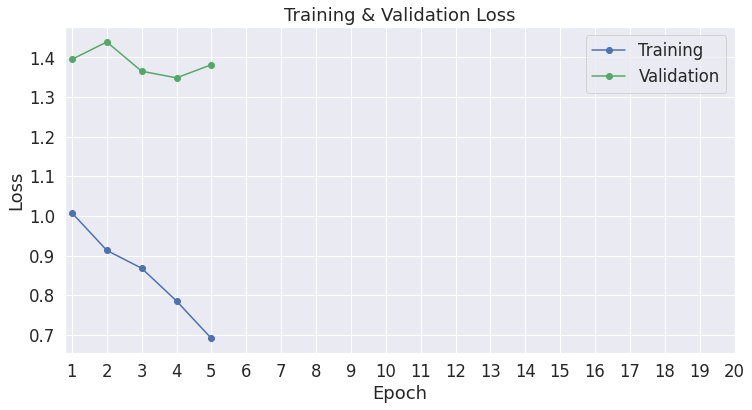

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'model_bert_multi_task_interactive_pre_trained_skill_bert/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_bert_multi_task_interactive_pre_trained_skill_bert/


('model_bert_multi_task_interactive_pre_trained_skill_bert/vocab.txt',
 'model_bert_multi_task_interactive_pre_trained_skill_bert/special_tokens_map.json',
 'model_bert_multi_task_interactive_pre_trained_skill_bert/added_tokens.json')

In [ ]:
  import json
  torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))
  # with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
  #     json.dump(model.config, f)

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder_BLOOM_LATEST")


In [ ]:
from google.colab import files


In [ ]:
!zip -r model_bert_multi_task_interactive_pre_trained_skill_bert.zip model_bert_multi_task_interactive_pre_trained_skill_bert
# files.download('model_bert_difficulty_prediction.zip')

  adding: model_bert_multi_task_interactive_pre_trained_skill_bert/ (stored 0%)
  adding: model_bert_multi_task_interactive_pre_trained_skill_bert/vocab.txt (deflated 53%)
  adding: model_bert_multi_task_interactive_pre_trained_skill_bert/tokenizer_config.json (stored 0%)
  adding: model_bert_multi_task_interactive_pre_trained_skill_bert/model_weights (deflated 7%)
  adding: model_bert_multi_task_interactive_pre_trained_skill_bert/special_tokens_map.json (deflated 40%)


In [ ]:
# !zip -r label_encoder_BLOOM_LATEST.zip label_encoder_BLOOM_LATEST
# files.download('label_encoder_BLOOM_LATEST.zip')

In [ ]:
test

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
0,How are western-style xylophones characterised?,"by a bright, sharp tone and high register",medium,2,How are western-style xylophones characterised...,2
1,Is Nairobi the capital of Kenya?,Yes,easy,0,Is Nairobi the capital of Kenya? Yes,3
2,How many sister cities does the City of Melbou...,six,medium,2,How many sister cities does the City of Melbou...,3
3,Is the electric eel a true eel?,No,easy,0,Is the electric eel a true eel? No,3
4,Does Swedish use the perfect participle to for...,No.,easy,0,Does Swedish use the perfect participle to for...,3
...,...,...,...,...,...,...
337,Where was there a vast swarm of butterflies?,In Kyoto there was a vast swarm of butterflies.,medium,2,Where was there a vast swarm of butterflies? I...,3
338,What is the most common romanization standard ...,Hanyu Pinyin,medium,2,What is the most common romanization standard ...,3
339,Is Jakarta the 12th largest city in the world?,yes,medium,2,Is Jakarta the 12th largest city in the world?...,2
340,What sort of turtles are ectothermic?,all of them,medium,2,What sort of turtles are ectothermic? all of them,2


In [ ]:
test_features = test["question_answer"].values
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:
test_labels

array([2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,

In [ ]:
test_features

array(['How are western-style xylophones characterised? by a bright, sharp tone and high register',
       'Is Nairobi the capital of Kenya? Yes',
       'How many sister cities does the City of Melbourne have? six',
       'Is the electric eel a true eel? No',
       'Does Swedish use the perfect participle to form the present perfect tense? No.',
       'Do the different species of zebras interbreed? no',
       'What are the reasons for hunting wild ducks? Meat, eggs, and feathers',
       'Does Romania share the same language with Moldova? Practically',
       'Which guitars use three single-coil pickups? Fender Stratocaster type guitars.',
       'How long does it take for the panda cubs skin to turn gray? One to two weeks',
       'Which temperature scale did Celsius propose? Celcius',
       'Where is Finland located? Northern Europe',
       'Is the capital city Oslo? No',
       'How many species of otter are there? 13',
       "What's the timber of ancient cimbals like? disfl

In [ ]:
test_features[0]

'How are western-style xylophones characterised? by a bright, sharp tone and high register'

In [ ]:
test_features[0]

'How are western-style xylophones characterised? by a bright, sharp tone and high register'

In [ ]:
# syllabus = get_syllabus(test_features.values)
# poincare_emb_test = get_poincare_embeddings(syllabus)
# # for i,oincare in enumerate(poincare_emb_test):
# #   for x in oincare:
# #     print(i)
# #     print(oincare)
# #     print(poincare_model.kv.get_vector(str(x)))

# poincare_embedding_test =  [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_emb_test ]
# max_val = 0
# max_emb =None
# for embedding in poincare_embedding_test:
#   val = embedding.shape[1]
#   if val >max_val:
#     max_val=val
#     max_emb =embedding
# max_val
# concatenated_embedding = []
# for embedding in poincare_embedding_test:
#   if embedding.shape[1] < max_val:
#     new_embedding = np.append(embedding, np.expand_dims(np.zeros(max_val-embedding.shape[1]),axis=0),axis=1)
#   else:
#     new_embedding = embedding
#   concatenated_embedding.append(np.squeeze(new_embedding,axis=0))
# poincare_embeddings_final = np.stack(concatenated_embedding, axis=0)
# for feature_set in test_features:
#   if feature_set[1]!=feature_set[1]: #to check for nan
#     print("here")
#     feature_set[1] = "unk"
#   else:
#     feature_set[1]=feature_set[1].lower()
# difficulty_level_vectors=[]
# for feature_set in test_features:
#   words = [word for word in feature_set[1].split(" ")]
#   if len(words) > 1:
#     print("here")
#     difficulty_level_vectors.append(np.mean(wv[words],axis=0))
#   else:
#     difficulty_level_vectors.append(wv[words].squeeze(axis=0))
# difficulty_level_vectors = np.array(difficulty_level_vectors)

In [ ]:
input_ids = []
attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
test_labels = torch.tensor(test_labels)
test_skill_labels = torch.tensor(test_skill_labels)

# Set the batch size.  
batch_size = 34
# test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# print(test_poincare_tensor.shape)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# print("difficulty_tensor",difficulty_tensor.shape)
# Combine the training inputs into a TensorDataset.
prediction_data = TensorDataset(input_ids, attention_masks, test_labels,test_skill_labels)
# Create the DataLoader.
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions,skill_predictions , true_labels, true_skill_labels = [], [], [], []

# Predict ea
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels,skill_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  # print("b_input_ids",b_input_ids.shape)
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs,skill_ouputs = model(b_input_ids,b_input_mask)

  logits = outputs
  skill_logits = skill_ouputs

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  skill_logits = skill_logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  skill_labels = skill_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  skill_predictions.append(skill_logits)
  true_labels.append(label_ids)
  true_skill_labels.append(skill_labels)


print('    DONE.')

Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


    DONE.


print('Positive samples: %d of %d (%.2f%%)' % (final_data.label.sum(), len(final_data.label), (final_data.label.sum() / len(final_data.label) * 100.0)))

In [ ]:
true_skill_labels[0]

array([2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3,
       4, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2])

In [ ]:
import numpy as np
pred =  np.argmax(predictions[0],axis=1).flatten()
pred

array([2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2])

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
import numpy as np
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.479


In [ ]:
flat_skill_predictions = np.concatenate(skill_predictions, axis=0)

flat_skill_predictions = np.argmax(flat_skill_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_skill_labels = np.concatenate(true_skill_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_skill_labels, flat_skill_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.637


In [ ]:
question_answer[30]

'Did Mainland Nova Scotia not come under British rule with the Treaty of Utrecht    (: ; ? no!'

In [ ]:
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {get_labels(label)}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
accuracy_per_class(flat_predictions,flat_true_labels)

Class: 0
Accuracy: 106/134

Class: 1
Accuracy: 50/85

Class: 2
Accuracy: 67/123



In [ ]:
accuracy_per_class(flat_predictions,flat_true_labels)

Class: Difficult
Accuracy: 106/134

Class: Easy
Accuracy: 50/85

Class: Medium
Accuracy: 67/123



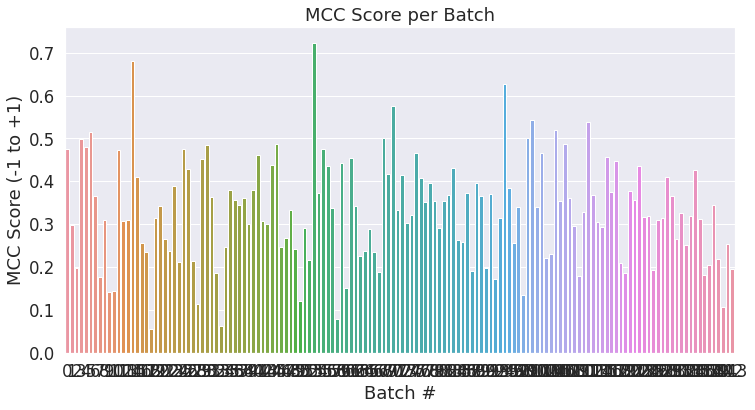

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.479


In [ ]:
print('Total MCC: %.3f' % mcc)


Total MCC: 0.247


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#difficulty
print(precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro'))

(0.652046783625731, 0.652046783625731, 0.652046783625731, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#difficulty
print(precision_recall_fscore_support(flat_true_labels, flat_predictions, average='macro'))

(0.641579548923942, 0.6413318391305072, 0.6370064910271096, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#difficulty
print(precision_recall_fscore_support(flat_true_labels, flat_predictions, average='weighted'))

(0.6672877902080783, 0.652046783625731, 0.6557537026989007, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#skill_name
print(precision_recall_fscore_support(flat_true_skill_labels, flat_skill_predictions, average='micro'))

(0.5012016604762946, 0.5012016604762946, 0.5012016604762946, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#skill name
print(precision_recall_fscore_support(flat_true_skill_labels, flat_skill_predictions, average='macro'))

(0.4829542858816799, 0.4630626921284685, 0.4700329767990987, None)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#skill name
print(precision_recall_fscore_support(flat_true_skill_labels, flat_skill_predictions, average='weighted'))

(0.4963391871168191, 0.5012016604762946, 0.4967305425385167, None)


In [ ]:
def get_confusion_matrix(predicted,actual):
    conf_matrix = np.zeros((5, 5))
    for pred,act in zip(predicted,actual):
        conf_matrix[act,pred]+=1
    return conf_matrix
        
def get_TP(confusion_matrix,label):
    tp = confusion_matrix[label][label]
    return tp

def get_FN(confusion_matrix,label):
    row = confusion_matrix[label,]
    row_truepositives = row[label]
    fn = row.sum() - row_truepositives
    return fn

def get_FP(confusion_matrix,tag):
    col = confusion_matrix[:,tag]
    col_tp = col[tag]
    #  sum of all values in column except tp
    fp = col.sum() - col_tp
    return fp
def Precision(conf_matrix):
    precision = 0.0
    for label in [0,1,2,3,4]:
        dividor= get_TP(conf_matrix,label)+get_FP(conf_matrix,label)
        if dividor != 0.0:
            precision += (get_TP(conf_matrix,label))/dividor
    return (precision / 5)

def Recall(conf_matrix):
    recall = 0.0
    for label in [0,1,2,3,4]:
        dividor=get_TP(conf_matrix,label)+get_FN(conf_matrix,label)
        if dividor != 0.0:
            recall += (get_TP(conf_matrix,label))/dividor
    return (recall / 5)

def F1(precision,recall):
    return (2*precision*recall)/(precision+recall)
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
def print_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision(conf_matrix)
    recall = Recall(conf_matrix)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [ ]:
def Precision_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_precision = dict()
    for label in [0,1,2,3,4]:
        true_sample = [sample for sample in test_samples if sample==label ]
        if (get_TP(conf_matrix,label)+get_FP(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) *(get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label)))
            label_wise_precision[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label))

    
    precision =  accum/len(test_samples)
            
    return precision


def Recall_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_recall = dict()
    for label in [0,1,2,3,4]:
        true_sample = [sample for sample in test_samples if sample==label ]

        if (get_TP(conf_matrix,label)+get_FN(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) * (get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label)))
            label_wise_recall[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label))

    
    recall =  accum/len(test_samples)
    return recall
def print_weighted_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision_macro_weighted(conf_matrix,test_labels)
    recall = Recall_macro_weighted(conf_matrix,test_labels)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [ ]:
def get_confusion_matrix(predicted,actual):
    conf_matrix = np.zeros((3, 3))
    for pred,act in zip(predicted,actual):
        conf_matrix[act,pred]+=1
    return conf_matrix
        
def get_TP(confusion_matrix,label):
    tp = confusion_matrix[label][label]
    return tp

def get_FN(confusion_matrix,label):
    row = confusion_matrix[label,]
    row_truepositives = row[label]
    fn = row.sum() - row_truepositives
    return fn

def get_FP(confusion_matrix,tag):
    col = confusion_matrix[:,tag]
    col_tp = col[tag]
    #  sum of all values in column except tp
    fp = col.sum() - col_tp
    return fp
def Precision(conf_matrix):
    precision = 0.0
    for label in [0,1,2]:
        dividor= get_TP(conf_matrix,label)+get_FP(conf_matrix,label)
        if dividor != 0.0:
            precision += (get_TP(conf_matrix,label))/dividor
    return (precision / 3)

def Recall(conf_matrix):
    recall = 0.0
    for label in [0,1,2]:
        dividor=get_TP(conf_matrix,label)+get_FN(conf_matrix,label)
        if dividor != 0.0:
            recall += (get_TP(conf_matrix,label))/dividor
    return (recall / 3)

def F1(precision,recall):
    return (2*precision*recall)/(precision+recall)
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
def print_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision(conf_matrix)
    recall = Recall(conf_matrix)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [ ]:
def Precision_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_precision = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]
        if (get_TP(conf_matrix,label)+get_FP(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) *(get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label)))
            label_wise_precision[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label))

    
    precision =  accum/len(test_samples)
            
    return precision


def Recall_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_recall = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]

        if (get_TP(conf_matrix,label)+get_FN(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) * (get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label)))
            label_wise_recall[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label))

    
    recall =  accum/len(test_samples)
    return recall
def print_weighted_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision_macro_weighted(conf_matrix,test_labels)
    recall = Recall_macro_weighted(conf_matrix,test_labels)
    f1_score = F1(precision,recall)
    print("Macro : Precision:{}, Recall: {}, F1: {}".format(precision,recall,f1_score))

In [ ]:
#difficuty macro
print_metrics(flat_predictions,flat_true_labels)

Macro : Precision:0.641579548923942, Recall: 0.6413318391305072, F1: 0.641455670112813


In [ ]:
#difficulty
print_weighted_metrics(flat_predictions,flat_true_labels)

Macro : Precision:0.6672877902080783, Recall: 0.652046783625731, F1: 0.6595792545533745


In [ ]:
#skill name
print_metrics(flat_skill_predictions,flat_true_skill_labels)

Macro : Precision:0.44999771470359706, Recall: 0.423681636020745, F1: 0.4364433423158034


In [ ]:
#skill name
print_weighted_metrics(flat_skill_predictions,flat_true_skill_labels)

Macro : Precision:0.8250412489318578, Recall: 0.8245614035087719, F1: 0.824801256430287


In [ ]:
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {get_labels(label)}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
accuracy_per_class(flat_predictions,flat_true_labels)

Class: Difficult
Accuracy: 106/134

Class: Easy
Accuracy: 50/85

Class: Medium
Accuracy: 67/123



In [ ]:
accuracy_per_class(flat_skill_predictions,flat_true_skill_labels)

Class: Analysing
Accuracy: 125/404

Class: Applying
Accuracy: 150/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 831/1356

Class: Understanding
Accuracy: 557/1282



In [ ]:
!cp -r /content/model_bert_multi_task_interactive_pre_trained_skill_bert.zip "/content/drive/My Drive/research_skill_name_prediction/" 

In [ ]:
!cp -r "/content/drive/My Drive/research_skill_name_prediction/model_bert_multi_task_prediction.zip" /content/

In [ ]:
!unzip model_bert_multi_task_prediction.zip

Archive:  model_bert_multi_task_prediction.zip
   creating: model_bert_multi_task_prediction/
  inflating: model_bert_multi_task_prediction/model_weights  
  inflating: model_bert_multi_task_prediction/tokenizer_config.json  
  inflating: model_bert_multi_task_prediction/special_tokens_map.json  
  inflating: model_bert_multi_task_prediction/vocab.txt  


In [ ]:
!cp -r /content/model_bert_multi_task_interactive_pre_trained_skill_bert "/content/drive/My Drive/research_skill_name_prediction/" 